# 4.3 실습1 - 붓꽃 데이터 회귀

## 4.3.1 문제 정의 및 학습 데이터 준비

In [1]:
# 라이브러리 로딩
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# 데이터 불러오기
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# 데이터분할
y = df['petal width (cm)']
X = df.drop(['petal width (cm)'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## 4.3.2 학습 - 선형회귀 모델

In [2]:
# 학습 모델1 - 선형 회귀 모델
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

# 학습
lr_model.fit(X_train, y_train)
print('weight:', lr_model.coef_)
print('bias:',lr_model.intercept_)

weight: [-0.24488106  0.24482729  0.53764071]
bias: -0.1491639103657183


In [3]:
# 평가
score = lr_model.score(X_test, y_test)
print('선형회귀 모델 R2: {0:.2f}'.format(score))

선형회귀 모델 R2: 0.94


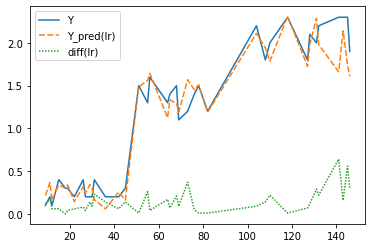

In [4]:
# 예측결과 시각화
y_pred = lr_model.predict(X_test)
lr_df = pd.DataFrame(data = {'Y': y_test, 'Y_pred(lr)': y_pred, 'diff(lr)': np.round(np.abs(y_test - y_pred), 2)})
sns.lineplot(data=lr_df)

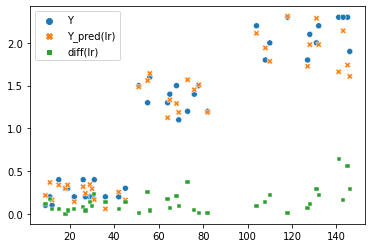

In [5]:
sns.scatterplot(data=lr_df)

## 4.3.3 학습 - 의사결정나무 기반의 회귀 알고리즘

In [6]:
from sklearn.tree import DecisionTreeRegressor

# 학습 - DecisionTreeRegressor 
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# 평가
score = tree_model.score(X_test, y_test)
print('의사결정나무 R2: {0:.2f}'.format(score))

의사결정나무 R2: 0.87


In [7]:
# 예측결과 
y_pred = tree_model.predict(X_test)

tree_df = pd.DataFrame(data = {'Y': y_test, 'Y_pred(tree)': y_pred, 'diff(tree)': np.round(np.abs(y_test - y_pred), 2)})
tree_df.sort_values(by=['diff(tree)'], ascending=False).head(10)

,Y,Y_pred(tree),diff(tree)
118,2.3,1.4,0.9
141,2.3,1.5,0.8
143,2.3,1.8,0.5
132,2.2,1.8,0.4
146,1.9,1.5,0.4
104,2.2,1.8,0.4
110,2.0,1.7,0.3
108,1.8,1.5,0.3
128,2.1,1.8,0.3
73,1.2,1.5,0.3


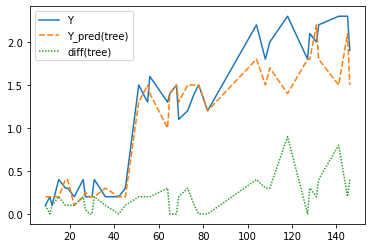

In [8]:
# 예측결과 시각화
sns.lineplot(data=tree_df)

In [9]:
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
lgb_model = LGBMRegressor(n_estimators=100, random_state=42)
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

model_list = [forest_model, lgb_model, xgb_model]

for model in model_list:
    model.fit(X_train , y_train)
    score = model.score(X_test, y_test)
    model_name = model.__class__.__name__
    print('{0} 모델 R2: {1:.2f}'.format(model_name, score))    

RandomForestRegressor 모델 R2: 0.94
LGBMRegressor 모델 R2: 0.95
[05:50:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor 모델 R2: 0.93


In [10]:
from sklearn.metrics import mean_squared_error, r2_score

def printRegressorResult(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print('MSE : {0:.3f} , RMSE : {1:.3f}, r2 : {2:.3f}'.format(mse , rmse, r2))

In [11]:
model_list = [lr_model, tree_model, forest_model, lgb_model, xgb_model]

for model in model_list:
    y_preds = model.predict(X_test)    
    print('{0} 모델'.format(model.__class__.__name__))   
    printRegressorResult(y_test, y_preds)

LinearRegression 모델
MSE : 0.040 , RMSE : 0.201, r2 : 0.937
DecisionTreeRegressor 모델
MSE : 0.081 , RMSE : 0.284, r2 : 0.874
RandomForestRegressor 모델
MSE : 0.041 , RMSE : 0.204, r2 : 0.935
LGBMRegressor 모델
MSE : 0.031 , RMSE : 0.176, r2 : 0.952
XGBRegressor 모델
MSE : 0.044 , RMSE : 0.209, r2 : 0.932
